<a href="https://colab.research.google.com/github/redman157/HocML/blob/master/pytorch_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0it [00:00, ?it/s]

100%|█████████▉| 170041344/170498071 [00:15<00:00, 7991010.31it/s]

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


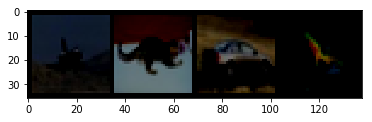

plane   cat   car  frog


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def imshow(img):
  img = img / 2
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

In [3]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.217


170500096it [00:30, 7991010.31it/s]                               

[1,  4000] loss: 1.868
[1,  6000] loss: 1.675
[1,  8000] loss: 1.557
[1, 10000] loss: 1.504
[1, 12000] loss: 1.436
[2,  2000] loss: 1.390
[2,  4000] loss: 1.360
[2,  6000] loss: 1.333
[2,  8000] loss: 1.305
[2, 10000] loss: 1.287
[2, 12000] loss: 1.277
Finished Training


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)
_, predicted = torch.max(outputs, 1)
imshow(torchvision.utils.make_grid(_))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [29]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
          x`
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 70 %
Accuracy of  bird : 34 %
Accuracy of   cat : 48 %
Accuracy of  deer : 37 %
Accuracy of   dog : 40 %
Accuracy of  frog : 71 %
Accuracy of horse : 66 %
Accuracy of  ship : 71 %
Accuracy of truck : 66 %


# Warn-up Numpy

In [0]:
import numpy as np
def sigmoid(x , derv = False):
  if derv == False:
    return 1 / np.sum(1, np.exp(-x))
  return np.np.matmul(x,1-x)
N, D_in, H, D_out = 64, 1000, 100, 10
x = np.random.rand(N, D_in)
y = np.random.rand(N, D_out)
# x(64,1000) y(64,10)

w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)
# w1(1000, 100) w2(100,10)

# (64,1000) (1000,100) (100,10) (10)

lr = 0.000001

In [0]:
for epoch in range(500):
  layer1 = x.dot(w1)
  layer1_relu = np.maximum(layer1, 0 )
  y_pred = layer1_relu.dot(w2)
  
  loss = np.sum(np.square(y_pred - y ))
  print("epoch {:d} \tloss {:.3f}".format(epoch, loss))
  # Backprop to compute gradients of w1 and w2 with respect to loss
  grad_y_pred = 2.0 * (y_pred - y )
  grad_w2 = layer1_relu.T.dot(grad_y_pred)
  
  grad_h_relu = grad_y_pred.dot(w2.T)
  grad_h = grad_h_relu.copy()
  grad_h[layer1 < 0] = 0
  
  grad_w1 = x.T.dot(grad_h)
  
  w1 -= lr * grad_w1
  w2 -= lr * grad_w2
  

In [0]:
import torch 
dtype = torch.float
device = torch.device("cpu")

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in, device= device, dtype = dtype)
y = torch.randn(N, D_out, device = device, dtype = dtype)

w1 = torch.randn(D_in, H,device = device, dtype = dtype )
w2 = torch.randn(H, D_out,device = device, dtype = dtype)

lr = 0.000001

for epoch in range(500):
  h = x.mm(w1)
  h_relu  = h.clamp(min = 0)
  y_pred = h_relu.mm(w2)

    # Compute and print loss
  loss = (y_pred - y).pow(2).sum().item()
  print(epoch, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
  grad_y_pred = 2.0 * (y_pred - y)
  grad_w2 = h_relu.t().mm(grad_y_pred)
  grad_h_relu = grad_y_pred.mm(w2.t())
  grad_h = grad_h_relu.clone()
  grad_h[h < 0] = 0
  grad_w1 = x.t().mm(grad_h)

  w1 -= lr * grad_w1
  w2 -= lr * grad_w2  

In [77]:
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)
for t in range(500):
  y_pred = x.mm(w1).clamp(min=0).mm(w2)
  loss = (y_pred - y).pow(2).sum()
  print(t, loss.item())  
  loss.backward()
  with torch.no_grad():
    w1 -= lr * w1.grad
    w2 -= lr * w2.grad

        # Manually zero the gradients after updating weights
    w1.grad.zero_()
    w2.grad.zero_()

0 31707114.0
1 28056354.0
2 27665222.0
3 26627110.0
4 22571616.0
5 16504395.0
6 10437536.0
7 6124219.0
8 3549319.5
9 2173410.0
10 1444746.25
11 1045667.25
12 809199.375
13 656182.375
14 547944.625
15 466164.09375
16 401390.9375
17 348535.15625
18 304483.0
19 267332.34375
20 235667.1875
21 208473.15625
22 184991.296875
23 164616.765625
24 146887.21875
25 131416.5
26 117843.9453125
27 105907.984375
28 95365.515625
29 86031.0859375
30 77745.8671875
31 70385.0
32 63823.89453125
33 57959.6015625
34 52709.859375
35 48000.5703125
36 43775.0
37 39971.51171875
38 36542.25
39 33444.54296875
40 30642.556640625
41 28107.3203125
42 25811.154296875
43 23727.685546875
44 21833.55859375
45 20109.58984375
46 18540.208984375
47 17107.970703125
48 15799.2978515625
49 14602.375
50 13506.890625
51 12502.5087890625
52 11581.0361328125
53 10734.9453125
54 9957.44140625
55 9242.048828125
56 8583.46875
57 7976.6201171875
58 7417.087890625
59 6900.802734375
60 6424.1904296875
61 5983.57421875
62 5576.2236328125

In [0]:
import torch
class MyReLU(torch.autograd.Function):
  @staticmethod
  def forward(ctx, input):
    ctx.save_for_backward(input)
    return input.clamp(min=0)
  